# Trabalho 1

## Problema 2


Um sistema de tráfego  é representado por um grafo orientado e ligado em que os arcos denotam vias de comunicação  (que podem ter um ou dois sentidos de comunicação), e nodos denotam pontos de acesso.  Use o NetworkX para representar  este sistema.
    >  O grafo tem de ser ligado o que significa que entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.
      1. Gerar aleatoriamente o grafo, considerando que existe igual probabilidade de cada via ter um só sentido ou os dois sentidos. Assuma N=256 para o número de nodos. Como o grafo é ligado, para cada nodo, tem de existir pelos menos um ramo descendente; assuma  uma probabilidade $p=2^{-k}$ para a existência de $k$ descendentes adicionais. 
       2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo mantendo o grafo ligado.

##### Objetivo

 $$ maximize \quad\big(\sum_{i} x_{i}\big) $$

#### Restrições

$$\forall_{j \in N}.\quad \big(\sum_{i< linhas-1} x_{i} * A_{i,j}\big) < 1$$

 - __N__ é o número de nodos do grafo
 - $x_{i}$ é uma variável binária 
 - __A__ é a matriz de incidência


In [124]:
import random
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pyscipopt import Model, quicksum

### A) Gerar grafo

In [125]:
N = 32

def criaGrafo(N):
    
    
    #criar um grafo vazio
    grafo = nx.DiGraph()
    
    
    #criar nodos
    grafo.add_nodes_from(range(1,N+1))
    
    
    
    
    for i in grafo.nodes:

        #1) Adicionar uma arestas
        t=np.random.choice(grafo.nodes)
        opt=random.choice([1,2])
        if(opt>1):
            grafo.add_edge(i,t)
            grafo.add_edge(t,i)
        else:
            grafo.add_edge(i,t)


        #2) Adicionar mais arestas    
        for j in range(1, N-1):
            #prob2=(math.pow(2,-j))/2
            prob=(math.pow(2,-j))
            opt=random.choice([1,2])
            e=np.random.choice(grafo.nodes)

            if (random.random() < prob):

                if (opt<2):
                    grafo.add_edge(i,e)
                else:
                    grafo.add_edge(i,e)
                    grafo.add_edge(e,i)
    

    return(grafo)


In [126]:

    
def verificaLigado(graph):    
    flag = 1


    #print(nx.is_connected(graph))


    while(flag==1):


        if nx.is_strongly_connected(graph):

            flag = 0
            

        else:
            graph = criaGrafo(N)
            
    return  graph

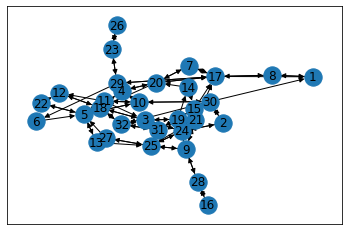

In [127]:
graph=criaGrafo(N)
grafo=verificaLigado(graph)
nx.draw_networkx(grafo)

### B) Determinar Corte Máximo

In [128]:
def determinaCaminhos(grafo, N):

    caminhos = []
    for i in range(1,N+1):
        for j in range(i+1,N+1):
                caminhos.append(nx.all_simple_paths(grafo, i, j))
                caminhos.append(nx.all_simple_paths(grafo, j, i))
    
    return caminhos
            
caminhos = determinaCaminhos(grafo,N)



In [129]:
matrizI = (nx.adjacency_matrix(grafo)).toarray()
#print(matrizI)

É possível interromper 32 vias de comunicação.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
0 95


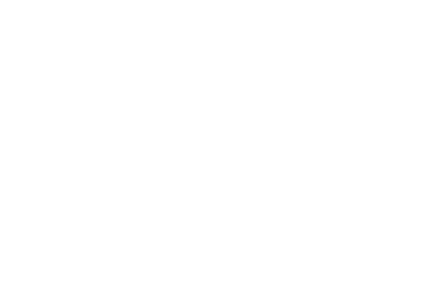

In [131]:
lista_caminhos = CorteMaxCaminhos(matrizI)
grafo_optimizado = nx.DiGraph()

def CorteMaxCaminhos(A): 
    x={}
    cover = Model()
    
    
    linhas = len(A)
    colunas = len(A[0])

    for i in range(linhas):
        x[i] = cover.addVar(str(i), vtype = 'B')
    
    
    for j in range(colunas):
        cover.addCons(quicksum([(x[i] * A[j][i]) \
                               for i in range(linhas)]) >= 0)
     
    cover.setObjective(quicksum(x.values()), sense = 'maximize')
    cover.optimize()
                      
    if cover.getStatus() == 'optimal':
        return[(i) for i in range(colunas) if cover.getVal(x[i]) == 1]

for caminho in lista_caminhos:
    for i in range(N):
        if matrizI[caminho][i] == 1 and caminho != i:
            grafo_optimizado.add_path([caminho + 1, i + 1])
            #grafo_optimizado.add_path([i + 1, caminho + 1])
            #n_caminhos_optimizado += 1
    
print("É possível interromper", len(CorteMaxCaminhos(matrizI)), "vias de comunicação.")

print(CorteMaxCaminhos(matrizI))

nx.draw(grafo_optimizado)
print(len(grafo_optimizado.edges), len(grafo.edges))